<a href="https://colab.research.google.com/github/Naman-Coder-950/Mini-Project-08/blob/main/R_Programming_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import random
import string

# Function to generate a random string of a given length
def random_string(length=12):
    letters = string.ascii_letters + string.digits
    return ''.join(random.choices(letters, k=length))

# Create 1000 lines of random strings
random_strings = [random_string() for _ in range(1000)]

# Write to a text file
with open("random_strings_1000.txt", "w") as file:
    file.write("\n".join(random_strings))


In [4]:
pip install pandas numpy seaborn matplotlib


Number of rows with missing values: 100


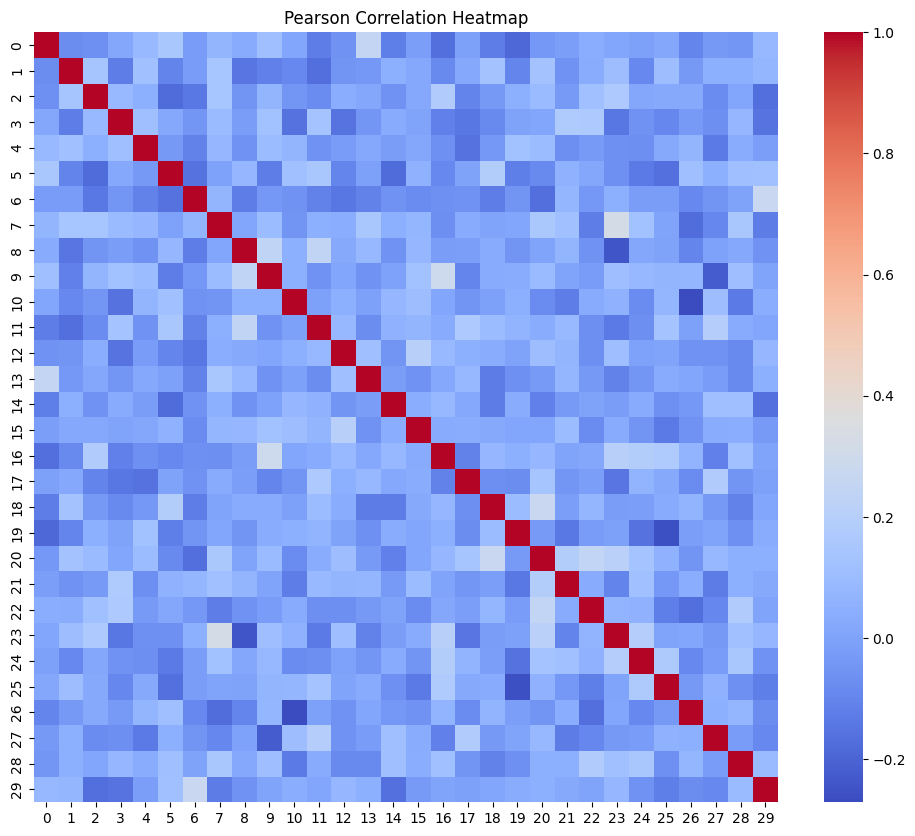

Selected columns with correlation ≤ 0.7: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
   0   1   2   3   4   5   6   7   8   9   ...  20  21  22  23  24  25  26  \
0   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   1   0   
2   0   0   0   0   0   1   0   0   0   0  ...   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   

   27  28  29  
0   0   0   0  
1   0   0   0  
2   0   0   0  
3   1   0   0  
4   0   0   0  

[5 rows x 30 columns]


<ipython-input-5-2342755004>:41: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Generate dataset
np.random.seed(42)
df = pd.DataFrame(np.random.randint(1, 201, size=(100, 30)))

# Step 2: Replace values in [10, 60] with NaN
df_masked = df.mask((df >= 10) & (df <= 60))

# Step 3: Count number of rows with missing values
rows_with_na = df_masked.isnull().any(axis=1).sum()
print("Number of rows with missing values:", rows_with_na)

# Step 4: Replace NaN with column mean
df_filled = df_masked.fillna(df_masked.mean())

# Step 5: Compute Pearson correlation and plot heatmap
correlation_matrix = df_filled.corr(method='pearson')
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Pearson Correlation Heatmap")
plt.show()

# Step 6: Select columns with correlation <= 0.7
correlated_cols = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            correlated_cols.add(correlation_matrix.columns[i])
selected_columns = [col for col in df_filled.columns if col not in correlated_cols]
df_selected = df_filled[selected_columns]
print("Selected columns with correlation ≤ 0.7:", selected_columns)

# Step 7: Normalize values between 0 and 10
df_normalized = (df_selected - df_selected.min()) / (df_selected.max() - df_selected.min()) * 10

# Step 8: Replace values: 1 if ≤ 0.5 else 0
df_binary = df_normalized.applymap(lambda x: 1 if x <= 0.5 else 0)

# Final output (showing first 5 rows of binary data)
print(df_binary.head())


In [6]:
pip install numpy pandas matplotlib seaborn scikit-learn scipy


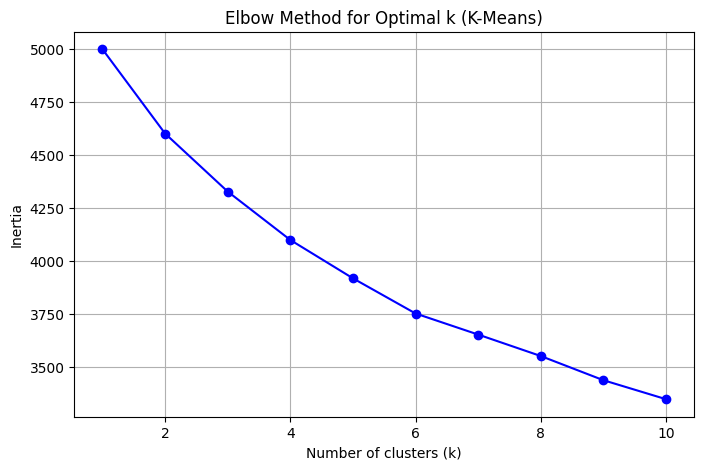

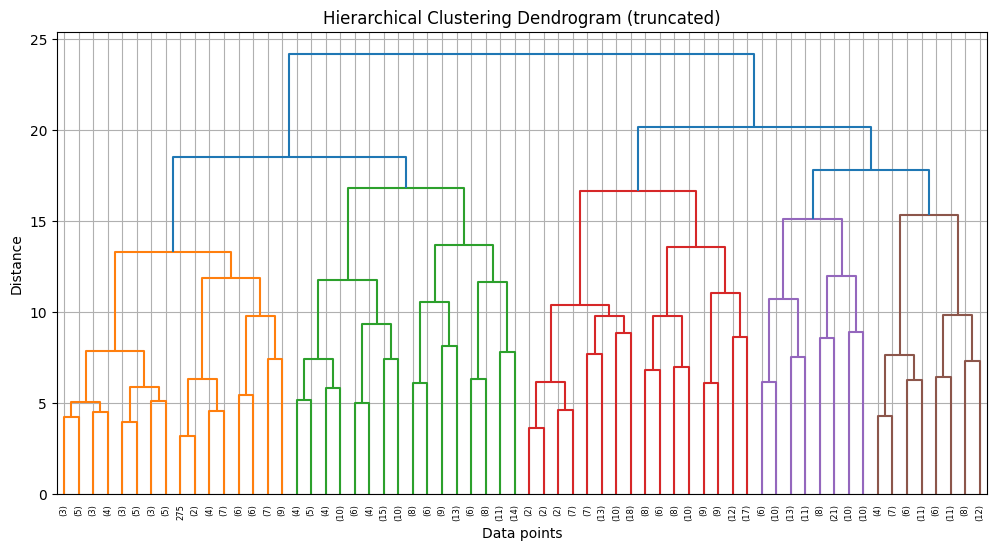

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Step 1: Create dataset
np.random.seed(42)
data = np.hstack([
    np.random.uniform(-10, 10, size=(500, 4)),    # Columns 1-4
    np.random.uniform(10, 20, size=(500, 4)),     # Columns 5-8
    np.random.uniform(-100, 100, size=(500, 2))   # Columns 9-10
])
df = pd.DataFrame(data, columns=[f'Col{i+1}' for i in range(10)])

# Normalize data for clustering
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Step 2: K-Means Clustering and Elbow Method
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k (K-Means)')
plt.grid(True)
plt.show()


# Step 3: Hierarchical Clustering and Dendrogram
linked = linkage(df_scaled, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


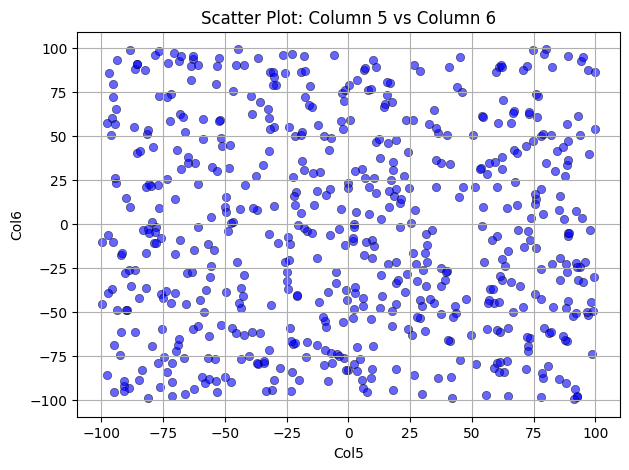

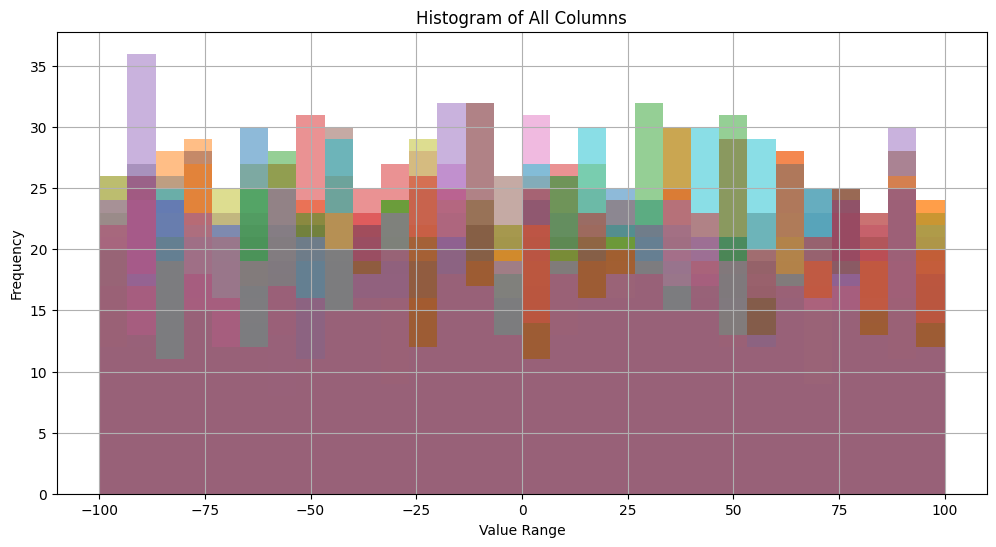

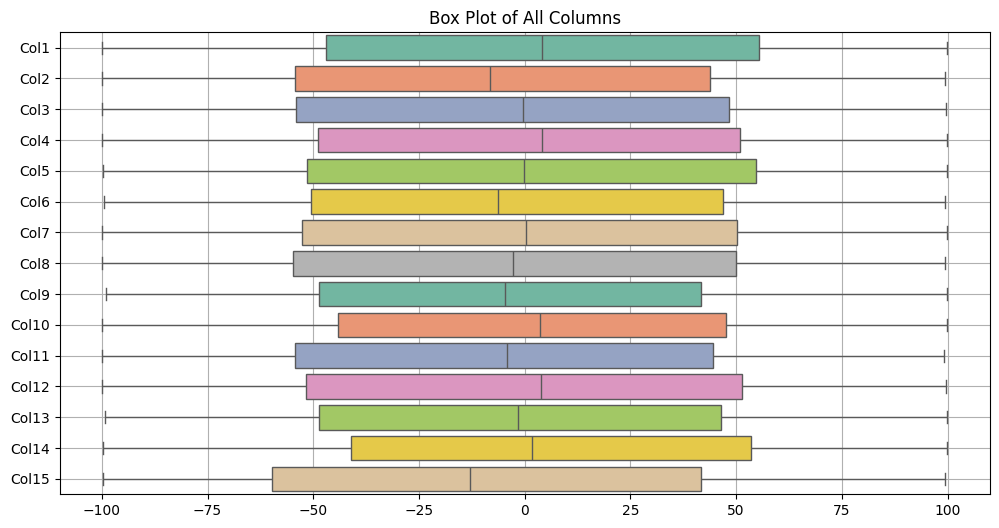

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Generate dataset
np.random.seed(42)
df = pd.DataFrame(
    np.random.uniform(-100, 100, size=(600, 15)),
    columns=[f'Col{i+1}' for i in range(15)]
)

# Step 2: Scatter plot between Column 5 and Column 6
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='Col5', y='Col6', color='blue', edgecolor='k', alpha=0.6)
plt.title('Scatter Plot: Column 5 vs Column 6')
plt.grid(True)
plt.show()

# Step 3: Histogram of all columns in one figure
df.plot(kind='hist', bins=30, alpha=0.5, figsize=(12, 6), legend=False)
plt.title('Histogram of All Columns')
plt.xlabel('Value Range')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Step 4: Box plot of all columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient='h', palette='Set2')
plt.title('Box Plot of All Columns')
plt.grid(True)
plt.show()


In [10]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu

# Step 1: Generate dataset
np.random.seed(42)
df = pd.DataFrame(
    np.random.uniform(5, 10, size=(500, 5)),
    columns=[f'Col{i+1}' for i in range(5)]
)

# Step 2: One-sample t-test on each column (vs mean = 7.5)
print("One-sample t-test (H0: mean = 7.5):")
for col in df.columns:
    stat, p = ttest_1samp(df[col], popmean=7.5)
    print(f"{col}: t-stat = {stat:.3f}, p-value = {p:.4f}")

# Step 3: Wilcoxon signed-rank test on each column (vs mean = 7.5)
print("\nWilcoxon Signed-Rank Test (H0: median = 7.5):")
for col in df.columns:
    try:
        stat, p = wilcoxon(df[col] - 7.5)
        print(f"{col}: stat = {stat:.3f}, p-value = {p:.4f}")
    except ValueError:
        print(f"{col}: Wilcoxon test not applicable (e.g., all values identical)")

# Step 4: Two-sample t-test between Column 3 and Column 4
print("\nTwo-sample t-test (Col3 vs Col4):")
t_stat, t_p = ttest_ind(df['Col3'], df['Col4'])
print(f"t-stat = {t_stat:.3f}, p-value = {t_p:.4f}")

# Step 5: Wilcoxon Rank-Sum Test (Mann-Whitney U Test) between Column 3 and Column 4
print("\nWilcoxon Rank-Sum Test (Mann-Whitney U) (Col3 vs Col4):")
u_stat, u_p = mannwhitneyu(df['Col3'], df['Col4'], alternative='two-sided')
print(f"U-stat = {u_stat:.3f}, p-value = {u_p:.4f}")


One-sample t-test (H0: mean = 7.5):
Col1: t-stat = 0.504, p-value = 0.6144
Col2: t-stat = -0.721, p-value = 0.4715
Col3: t-stat = 0.037, p-value = 0.9708
Col4: t-stat = -0.104, p-value = 0.9173
Col5: t-stat = -0.149, p-value = 0.8816

Wilcoxon Signed-Rank Test (H0: median = 7.5):
Col1: stat = 60997.000, p-value = 0.6145
Col2: stat = 60213.000, p-value = 0.4555
Col3: stat = 62434.000, p-value = 0.9529
Col4: stat = 62199.000, p-value = 0.8951
Col5: stat = 62175.000, p-value = 0.8893

Two-sample t-test (Col3 vs Col4):
t-stat = 0.100, p-value = 0.9205

Wilcoxon Rank-Sum Test (Mann-Whitney U) (Col3 vs Col4):
U-stat = 125544.000, p-value = 0.9053
